<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
#(x_train, y_train),(x_test, y_test)
(x_train, y_train),(x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)#手寫data
print(y_train.shape)#正確答案
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


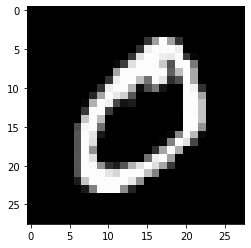

In [3]:
import matplotlib.pyplot as plt
print(y_train[1])
#choose colormap-> cmap = "YlGn_r"(顏色反轉)
plt.imshow(x_train[1], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    # 784*128(線條）128 (bias) = 100480      
    Dense(128, activation="relu", input_dim=784),
    #128*10(線條）＋ 10 (bias)= 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# mse坡度在你預測很差的時候太小, cross entropy坡度好多了
# 二元(sigmoid): Binary Cross Entropy  p log (1/q) + (1-p) log (1/1-q)
# 多元(softmax): Categorical Cross Entropy  pi(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [7]:
# 資料預處理 one-hot encoding
# 答案: [0, 5, 2, 3....]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
#圖片：[[255, 0, 255, 128]] 做處理
# 28*28 ->784
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0
print(x_train_norm[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
# validation_split :切出一些驗證資料來做驗證(0.1 : 54000筆資料訓練)
# epochs: 看幾輪（10輪：54000*10)
# batch_size: 看了多少比在做一次梯度調整（看圖片大小尺寸，圖片小batch設大一點(尺寸20*20):200, 圖片大batch設小一點（尺寸200＊200):20 #舉例：問路時不要只問一個人，多問幾人在確認調整方向
# 200batch, 10epoch: 54000*10/200->2700(梯度調整)
#verbose: 0(無聲) 1（最詳細）2(沒有進度條） #因為不想看到它顯示出進度條“＝
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("mlp.h5",save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)#epochs連續五次val_lose沒有變好就停下 #上限100次
#調整dense layer的可看到模型參數變化

Epoch 1/100
270/270 - 1s - loss: 0.0091 - accuracy: 0.9987 - val_loss: 0.0758 - val_accuracy: 0.9802
Epoch 2/100
270/270 - 1s - loss: 0.0081 - accuracy: 0.9990 - val_loss: 0.0769 - val_accuracy: 0.9817
Epoch 3/100
270/270 - 1s - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.0763 - val_accuracy: 0.9810
Epoch 4/100
270/270 - 1s - loss: 0.0064 - accuracy: 0.9992 - val_loss: 0.0783 - val_accuracy: 0.9807
Epoch 5/100
270/270 - 1s - loss: 0.0056 - accuracy: 0.9996 - val_loss: 0.0793 - val_accuracy: 0.9807
Epoch 6/100
270/270 - 1s - loss: 0.0049 - accuracy: 0.9996 - val_loss: 0.0778 - val_accuracy: 0.9797


In [16]:
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow：就帶on-hot
#不是在tensorflow就帶y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns=["{}(預測)".format(i) for i in range(10)],
             index=["{}(正確)".format(i) for i in range(10)],)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),970,0,2,3,1,1,1,1,1,0
1(正確),0,1127,3,0,0,1,2,0,2,0
2(正確),4,3,1004,2,2,0,1,9,5,2
3(正確),1,0,2,993,0,3,1,4,3,3
4(正確),0,0,3,1,964,0,4,0,1,9
5(正確),3,0,0,9,1,864,4,2,5,4
6(正確),5,3,2,1,6,5,934,0,2,0
7(正確),1,4,8,3,1,0,0,1006,0,5
8(正確),5,1,3,13,6,3,2,6,929,6
9(正確),3,3,0,8,6,2,0,2,0,985
